In [1]:
#Importar bibliotecas necessárias
import pandas as pd
import numpy as np 
import os
cwd = os.getcwd()
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report
import warnings
warnings.filterwarnings("ignore")




In [2]:
 # Carregar dados
# ler o arquivo CSV, ignorando as primeiras linhas que contêm apenas informações sobre as colunas
cartao = pd.read_csv('/Users/batistajunior/Downloads/dadocartaodecredito.csv', skiprows=[0])

display(cartao)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
# Selecionar as colunas que serão usadas para prever a inadimplência
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
            'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
            'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Selecionar a variável resposta
target = 'default payment next month'

# Separar os dados em dados de treino e dados de teste
X_train, X_test, y_train, y_test = train_test_split(cartao[features], cartao[target], random_state=42)

# Criar um modelo de regressão logística
model = LogisticRegression()

# Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)

# Imprimir a acurácia do modelo
print("Acurácia do modelo:", accuracy)


Acurácia do modelo: 0.7828


In [4]:
cartao.isna().sum()


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [5]:
X = cartao.iloc[:, :-1]
y = cartao.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:


model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



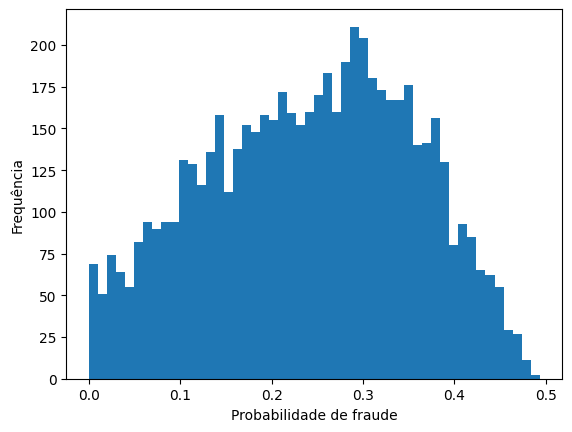

In [7]:
probs = model.predict_proba(X_test)
fraud_probs = probs[:, 1]

plt.hist(fraud_probs, bins=50)
plt.xlabel('Probabilidade de fraude')
plt.ylabel('Frequência')
plt.show()

In [8]:
cartao['acima_200'] = cartao['BILL_AMT1'] > 200
freq_acima_200 = cartao['acima_200'].value_counts()


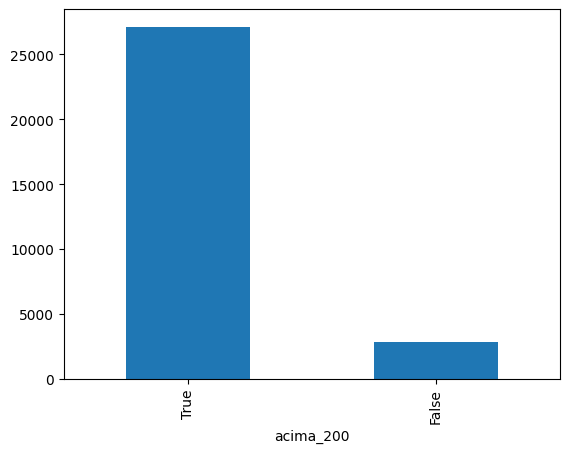

In [9]:
freq_acima_200.plot.bar()
plt.show()

In [10]:
cartao[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [11]:
terceiro_quartil = cartao[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].quantile(q=0.75)


In [12]:
faturas_altas = ((cartao['BILL_AMT1'] > terceiro_quartil['BILL_AMT1']) | 
                 (cartao['BILL_AMT2'] > terceiro_quartil['BILL_AMT2']) |
                 (cartao['BILL_AMT3'] > terceiro_quartil['BILL_AMT3']) |
                 (cartao['BILL_AMT4'] > terceiro_quartil['BILL_AMT4']) |
                 (cartao['BILL_AMT5'] > terceiro_quartil['BILL_AMT5']) |
                 (cartao['BILL_AMT6'] > terceiro_quartil['BILL_AMT6']))
clientes_faturas_altas = cartao[faturas_altas]


In [13]:
prob_fraude = clientes_faturas_altas['default payment next month'].mean()


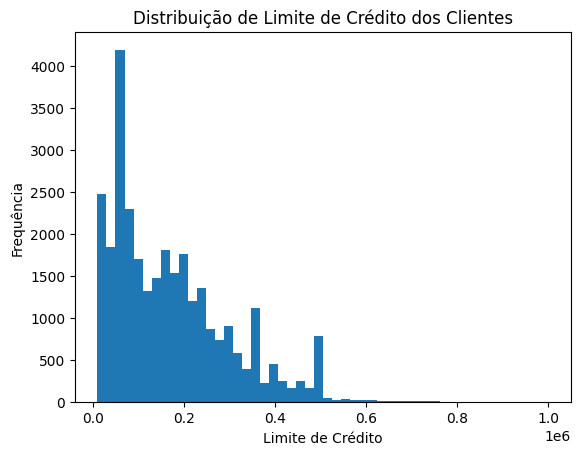

In [14]:
plt.hist(cartao['LIMIT_BAL'], bins=50)
plt.xlabel('Limite de Crédito')
plt.ylabel('Frequência')
plt.title('Distribuição de Limite de Crédito dos Clientes')
plt.show()

# conclusão

In [15]:
### Com base nessa frequência não podemos tirar uma conclusão clara, pois outros fatores pode influenciar e não quer dizer que poderá ou pode haver fraudes














